In [1]:
result_path = "/Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/removed_best_first_building_blocks/"
save_path = "/Users/alankaihassen/Development/diversity_mcts/repository/code/SPRS_WIP/results/visualizations"

data_info = {
    # retrostar
    "0_uspto190_default_retrostar_0": result_path + "0_dpvn_ssm_uspto190_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf",
    "0_chembl_default_retrostar_0": result_path + "0_dpvn_ssm_chembl_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf",
    "0_gdb17_default_retrostar_0": result_path + "0_dpvn_ssm_gdb17_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf",
       
    # mcts
    "1_uspto190_default_mcts": result_path + "1_dpvn_ssm_uspto190_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30.hdf",
    "1_chembl_default_mcts": result_path + "1_dpvn_ssm_chembl_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30.hdf",
    "1_gdb17_default_mcts": result_path + "1_dpvn_ssm_gdb17_DEFAULT_mcts_50_wide_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30.hdf",

    # distance mcts
    "2_uspto190_selection_distance_mcts": result_path + "2_dpvn_ssm_uspto190_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30.hdf",
    "2_chembl_selection_distance_mcts": result_path + "2_dpvn_ssm_chembl_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30.hdf",
    "2_gdb17_selection_distance_mcts": result_path + "2_dpvn_ssm_gdb17_mcts_diversity_forcing_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30.hdf",

    # expansion clustering retrostar
    "5_uspto190_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_uspto190_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf",
    "5_chembl_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_chembl_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30_25000_iterations.hdf",
    "5_gdb17_expansion_clustering_retrostar": result_path + "5_dpvn_ssm_gdb17_retrostar_0_clustered_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30_25000_iterations.hdf",

    # expansion clustering mcts
    "6_uspto190_expansion_clustering_mcts": result_path + "6_dpvn_ssm_uspto190_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30.hdf",
    "6_chembl_expansion_clustering_mcts": result_path + "6_dpvn_ssm_chembl_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30.hdf",
    "6_gdb17_expansion_clustering_mcts": result_path + "6_dpvn_ssm_gdb17_expansion_cluster_mcts_first_occurence_policy_uspto_template_based_stock_emolecules_without_retrostar_0_depth_30.hdf"
}



In [2]:
# load data from hdf

import pandas as pd

def read_hdf(path):
    data = pd.read_hdf(path, key="table")
    # drop trees
    data = data.drop(columns=["trees"])
    profiling_df = pd.DataFrame(data["profiling"].tolist())
    data = pd.concat([data, profiling_df], axis=1)
    profiling_df = pd.DataFrame(data["policy_used_counts"].tolist())
    data = pd.concat([data, profiling_df], axis=1)
    
    return data

def calculate_solved_rate(df, maximum_expansion_calls = None):
    dataframe_length = len(df)
    if maximum_expansion_calls is not None:
        df = df[df["expansion_calls"] <= maximum_expansion_calls]
    solved_rate = df["is_solved"].sum() / dataframe_length
    return solved_rate

def calculate_solved_rate_based_on_iteration(df, maximum_iteration = None):
    dataframe_length = len(df)
    if maximum_iteration is not None:
        df = df[df["first_solution_iteration"] <= maximum_iteration]
    solved_rate = df["is_solved"].sum() / dataframe_length
    return solved_rate

selected_key = "6_chembl_expansion_clustering_mcts"
selected_df = read_hdf(data_info[selected_key])
selected_df

,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,policy_used_counts,profiling,stock_info,top_scores,expansion_calls,reactants_generations,iterations,clustered_tree_width,tree_width,retrostar_mlp
0,0,CCN1CCN(Cc2ccc(NC(=O)c3ccc(C)c(C#Cc4coc5ccccc4...,12.010439,12.010370,1,16,3,5,12,2,...,{'retrostar_mlp': 15},"{'expansion_calls': 4, 'reactants_generations'...",{'CCN1CCN(C(=O)c2ccc(N)cc2C(F)(F)F)CC1': ['emo...,"0.9940, 0.9866, 0.6774",4,0,1,"[4, 5, 3, 4]","[24, 70, 38, 27]",15
1,1,CCNC(=O)c1ccc2c(c1)NC(=O)C2=C(Nc1ccc(N(CCN(C)C...,1193.724525,0.000000,0,21671,24,14,15394,0,...,{'retrostar_mlp': 21670},"{'expansion_calls': 6777, 'reactants_generatio...",{'CCN=[N+]=[N-]': ['emolecules_without_retrost...,"0.7398, 0.7185, 0.7149, 0.7149, 0.7149, 0.7149...",6777,0,500,"[4, 7, 5, 5, 4, 5, 6, 4, 2, 2, 4, 5, 5, 9, 5, ...","[25, 57, 75, 74, 52, 56, 80, 57, 19, 34, 57, 5...",21670
2,2,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc(Cl)c(Oc2cccc(NC(...,11.391145,11.391085,1,29,5,6,23,1,...,{'retrostar_mlp': 28},"{'expansion_calls': 6, 'reactants_generations'...",{'N#CCC(=O)O': ['emolecules_without_retrostar_...,"0.9634, 0.7734, 0.7375",6,0,1,"[3, 6, 6, 6, 5, 2]","[14, 37, 49, 42, 58, 18]",28
3,3,O=C1c2cc(OCCC3CCN(Cc4ccc(C5=NCCN5)cc4)CC3)ccc2...,234.235658,234.235598,23,2556,21,17,1960,5,...,{'retrostar_mlp': 2555},"{'expansion_calls': 618, 'reactants_generation...",{'O=C1NCCCc2ccc(F)cc21': ['emolecules_without_...,"0.9634, 0.9634, 0.9634",618,0,23,"[7, 7, 9, 8, 12, 17, 15, 13, 8, 9, 9, 7, 6, 6,...","[43, 47, 47, 72, 121, 159, 138, 106, 71, 84, 9...",2555
4,4,COc1cccc(C(=O)Cn2c(=O)c3c(nc(N4CCCC(N)C4)n3CC=...,533.344190,0.000000,0,14016,28,14,9596,0,...,{'retrostar_mlp': 14015},"{'expansion_calls': 4893, 'reactants_generatio...",{'CC(C)=CCBr': ['emolecules_without_retrostar_...,"0.7734, 0.7624, 0.7624",4893,0,500,"[3, 3, 6, 7, 8, 6, 3, 3, 4, 5, 2, 5, 5, 7, 8, ...","[22, 17, 64, 87, 97, 64, 18, 18, 41, 51, 33, 4...",14015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Nc1nc(=O)[nH]c2c1C(c1ccc(Cl)cc1Cl)C1=C(CCCC1=O...,25.343292,0.000000,0,65,15,6,27,0,...,{'retrostar_mlp': 64},"{'expansion_calls': 53, 'reactants_generations...","{'N': [], 'O=S(=O)([O-])Cl': [], 'O=C(O)c1cccc...","0.3455, 0.3167, 0.3167",53,0,500,"[2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, ...","[16, 9, 12, 14, 9, 8, 8, 8, 3, 7, 5, 3, 11, 4,...",64
996,996,NCc1ccc(Cl)cc1CNC(=O)C1CCCN1C(=O)C(CCc1cccc[n+...,1330.881760,0.000000,0,34992,26,17,26267,0,...,{'retrostar_mlp': 34991},"{'expansion_calls': 9225, 'reactants_generatio...",{'OC1CCCCC1': ['emolecules_without_retrostar_0...,"0.8453, 0.8453, 0.8448",9225,0,500,"[3, 5, 5, 2, 6, 5, 3, 3, 4, 4, 2, 1, 1, 2, 1, ...","[32, 33, 35, 11, 60, 77, 59, 60, 37, 30, 22, 2...",34991
997,997,CC(C)(Cc1ccc(C(=O)Oc2ccc(C(=N)N)cc2F)s1)C(=O)N...,313.965385,0.000000,0,4350,29,17,2751,0,...,{'retrostar_mlp': 4349},"{'expansion_calls': 1852, 'reactants_generatio...",{'NC1CC=CCC1C(=O)O': ['emolecules_without_retr...,"0.8277, 0.8202, 0.8051, 0.8051",1852,0,500,"[3, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, ...","[21, 14, 41, 41, 47, 23, 20, 20, 22, 23, 45, 2...",4349
998,998,COc1ccc(C(=O)NC(C(=O)Nc2ccc(S(=O)(=O)N3CCOCC3)...,10.846369,10.846301,3,32,4,6,22,3,...,{'retrostar_mlp': 31},"{'expansion_calls': 12, 'reactants_generations...",{'O=[N+]([O-])c1ccc(S(=O)(=O)N2CCOCC2)cc1': ['...,"0.9940, 0.9750, 0.9750",12,0,3,"[4, 3, 2, 1, 6, 3, 2, 3, 2, 5]","[16, 41, 23, 1, 53, 21, 24, 23, 10, 32]",31


In [3]:
# get the mean of each list

clustered_tree_width = selected_df["clustered_tree_width"].apply(lambda x: sum(x) / len(x)).mean()
clustered_tree_width

4.503176716758111

In [4]:
selected_df["first_solution_iteration"].max()

479

In [5]:
# Initialize an empty list to store the results
results = []

# Iterate over each key in data_info
for key, path in data_info.items():
    if path != "":  # Check if the path is not empty
        print(f"Processing {key} in path {path}...")
        df = read_hdf(path)
        solved_rate = calculate_solved_rate(df)
        # calculate the solved rate between 0 and 50000 expansion calls
        
        expansion_iteration_range = []
        solved_rate_per_expansion_call = []
        
        for i in range(0, 25000, 100):
            expansion_iteration_range.append(i)
            solved_rate_per_expansion_call.append(calculate_solved_rate(df, i))

        iteration_range = []
        solved_rate_per_iteration = []
        
        for i in range(0, 600, 10):
            iteration_range.append(i)
            solved_rate_per_iteration.append(calculate_solved_rate_based_on_iteration(df, i))

        average_solved_iteration = df["first_solution_iteration"].mean()        
        average_expansion_calls = df["expansion_calls"].mean()

        if "clustered_tree_width" in df.columns:
            clustered_tree_width = df["clustered_tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
                ).mean()
        else:
            clustered_tree_width = 0

        if "tree_width" in df.columns:
            normal_tree_width = df["tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
                ).mean()
        else:
            normal_tree_width = 0

        solved_df = df[df["is_solved"] == True]
        average_solved_iteration = solved_df["first_solution_iteration"].mean()
        average_solved_time = solved_df["search_time"].mean() / 60 
        solved_times = solved_df["search_time"].to_list()
        solved_expansion_calls = solved_df["expansion_calls"].mean()

        if "clustered_tree_width" in solved_df.columns:
            solved_clustered_tree_width = solved_df["clustered_tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
            ).mean()
        else:
            solved_clustered_tree_width = 0

        if "tree_width" in solved_df.columns:
            solved_normal_tree_width = solved_df["tree_width"].apply(
                lambda x: sum(x) / len(x) if len(x) > 0 else 0
            ).mean()
        else:
            solved_normal_tree_width = 0

        result_dict = {
            "key": key,
            "solved_rate": solved_rate,
            "expansion_iteration_range": expansion_iteration_range,
            "solved_rate_per_expansion_call": solved_rate_per_expansion_call,
            "iteration_range": iteration_range,
            "solved_rate_per_iteration": solved_rate_per_iteration,
            "average_solved_iteration": average_solved_iteration,
            "average_solved_time": average_solved_time,
            "solved_times": solved_times,
            "average_expansion_calls": average_expansion_calls,
            "average_solved_expansion_calls": solved_expansion_calls,
            # tree width
            "average_clustered_tree_width": clustered_tree_width,
            "average_normal_tree_width": normal_tree_width,
            "solved_average_clustered_tree_width": solved_clustered_tree_width,
            "solved_average_normal_tree_width": solved_normal_tree_width
        }

        #average_policy_used_counts = df["policy_used_counts_retrostar_mlp"].mean()
        results.append(result_dict)

# Create a new dataframe from the results
solved_rate_df = pd.DataFrame(results)
solved_rate_df

Processing 0_uspto190_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/removed_best_first_building_blocks/0_dpvn_ssm_uspto190_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf...
Processing 0_chembl_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/removed_best_first_building_blocks/0_dpvn_ssm_chembl_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf...
Processing 0_gdb17_default_retrostar_0 in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/removed_best_first_building_blocks/0_dpvn_ssm_gdb17_retrostar_0_policy_uspto_template_based_stock_emolecules_without_retrostar_depth_30_25000_iterations.hdf...
Processing 1_uspto190_default_mcts in path /Users/alankaihassen/Development/diversity_mcts/repository/data/results/azf/removed_best_first_build

,key,solved_rate,expansion_iteration_range,solved_rate_per_expansion_call,iteration_range,solved_rate_per_iteration,average_solved_iteration,average_solved_time,solved_times,average_expansion_calls,average_solved_expansion_calls,average_clustered_tree_width,average_normal_tree_width,solved_average_clustered_tree_width,solved_average_normal_tree_width
0,0_uspto190_default_retrostar_0,0.510526,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.031578947368421054, 0.0947368421052631...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.0, 0.0, 0.005263157894736842, 0.010526...",4979.288660,12.461375,"[87.31860518455505, 349.2029309272766, 542.246...",14778.900000,4979.288660,0.000000,0.000000,0.000000,0.000000
1,0_chembl_default_retrostar_0,0.717000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.423, 0.478, 0.503, 0.518, 0.53, 0.543,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.202, 0.277, 0.322, 0.355, 0.375, 0.384...",1395.093445,3.957295,"[5.030200004577637, 12.026883125305176, 5.7475...",8059.012000,1395.093445,0.000000,0.000000,0.000000,0.000000
2,0_gdb17_default_retrostar_0,0.084000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.009, 0.014, 0.02, 0.022, 0.025, 0.026,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.004, 0.005, 0.005, 0.005, 0.005, 0.006...",5064.440476,11.757692,"[66.27627229690552, 883.7193095684052, 90.7582...",23175.423000,5064.440476,0.000000,0.000000,0.000000,0.000000
3,1_uspto190_default_mcts,0.257895,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.005263157894736842, 0.0105263157894736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.08947368421052632, 0.11578947368421053, 0.1...",69.489796,114.996683,"[415.0746989250183, 23275.04514169693, 11837.0...",21005.684211,9440.408163,0.000000,50.348126,0.000000,43.519325
4,1_chembl_default_mcts,0.531000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.131, 0.161, 0.18, 0.194, 0.207, 0.214,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.126, 0.29, 0.329, 0.348, 0.363, 0.38, 0.398...",55.308851,77.221198,"[45.08450126647949, 45.04267382621765, 2683.79...",13410.217000,6129.621469,0.000000,45.853086,0.000000,43.299685
5,1_gdb17_default_mcts,0.036000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.001, 0.003, 0.003, 0.004, 0.004, 0.004...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.012, 0.014, 0.016, 0.018, 0.018, 0.018, 0.0...",111.944444,105.874495,"[2766.339781522751, 2464.1171169281006, 5683.5...",20858.800000,11092.861111,0.000000,39.672857,0.000000,38.253536
6,2_uspto190_selection_distance_mcts,0.247368,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.005263157894736842, 0.0105263157894736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.07894736842105263, 0.11052631578947368, 0.1...",82.170213,119.616581,"[456.55221009254456, 19900.53374505043, 16841....",24250.968421,11108.276596,38.686106,53.376932,33.075715,45.312415
7,2_chembl_selection_distance_mcts,0.533000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.118, 0.143, 0.164, 0.181, 0.192, 0.206...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.126, 0.277, 0.318, 0.34, 0.362, 0.371, 0.39...",60.390244,71.189929,"[36.07052278518677, 35.51864147186279, 1486.30...",15563.184000,6939.711069,37.135698,48.640742,36.812752,45.242387
8,2_gdb17_selection_distance_mcts,0.040000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.002, 0.004, 0.004, 0.004, 0.004, 0.005...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.019, 0.023, 0.024, 0.026, 0.026, 0.027, 0.0...",84.600000,121.707467,"[7652.236788988113, 5647.466521978378, 265.960...",23567.036000,14149.675000,30.012561,43.559460,31.153511,42.197085
9,5_uspto190_expansion_clustering_retrostar,0.089474,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.021052631578947368, 0.0315789473684210...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 

In [6]:
# split keyi nto dataset and algorithm
solved_rate_df["dataset"] = solved_rate_df["key"].apply(lambda x: x.split("_")[1])

# algoirthm options are: "retrostar", "DEFAULT", "SUPER". so a string comparison
def find_algorithm(key):
    if "default_retrostar_0" in key:
        return "Retro*-0"
    elif "default_mcts" in key:
        return "MCTS"
    elif "selection_distance_mcts" in key:
        return "Distance-MCTS"
    elif "expansion_clustering_retrostar" in key:
        return "Cluster-Retro*-0"
    elif "expansion_clustering_mcts" in key:
        return "Cluster-MCTS"


solved_rate_df["algorithm"] = solved_rate_df["key"].apply(find_algorithm)
  
solved_rate_df['dataset'] = solved_rate_df['dataset'].replace({
    'chembl': 'ChEMBL-1000',
    'gdb17': 'GDB17-1000',
    'uspto190': 'USPTO-190'
})

solved_rate_df

,key,solved_rate,expansion_iteration_range,solved_rate_per_expansion_call,iteration_range,solved_rate_per_iteration,average_solved_iteration,average_solved_time,solved_times,average_expansion_calls,average_solved_expansion_calls,average_clustered_tree_width,average_normal_tree_width,solved_average_clustered_tree_width,solved_average_normal_tree_width,dataset,algorithm
0,0_uspto190_default_retrostar_0,0.510526,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.031578947368421054, 0.0947368421052631...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.0, 0.0, 0.005263157894736842, 0.010526...",4979.288660,12.461375,"[87.31860518455505, 349.2029309272766, 542.246...",14778.900000,4979.288660,0.000000,0.000000,0.000000,0.000000,USPTO-190,Retro*-0
1,0_chembl_default_retrostar_0,0.717000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.423, 0.478, 0.503, 0.518, 0.53, 0.543,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.202, 0.277, 0.322, 0.355, 0.375, 0.384...",1395.093445,3.957295,"[5.030200004577637, 12.026883125305176, 5.7475...",8059.012000,1395.093445,0.000000,0.000000,0.000000,0.000000,ChEMBL-1000,Retro*-0
2,0_gdb17_default_retrostar_0,0.084000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.009, 0.014, 0.02, 0.022, 0.025, 0.026,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.0, 0.004, 0.005, 0.005, 0.005, 0.005, 0.006...",5064.440476,11.757692,"[66.27627229690552, 883.7193095684052, 90.7582...",23175.423000,5064.440476,0.000000,0.000000,0.000000,0.000000,GDB17-1000,Retro*-0
3,1_uspto190_default_mcts,0.257895,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.005263157894736842, 0.0105263157894736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.08947368421052632, 0.11578947368421053, 0.1...",69.489796,114.996683,"[415.0746989250183, 23275.04514169693, 11837.0...",21005.684211,9440.408163,0.000000,50.348126,0.000000,43.519325,USPTO-190,MCTS
4,1_chembl_default_mcts,0.531000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.131, 0.161, 0.18, 0.194, 0.207, 0.214,...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.126, 0.29, 0.329, 0.348, 0.363, 0.38, 0.398...",55.308851,77.221198,"[45.08450126647949, 45.04267382621765, 2683.79...",13410.217000,6129.621469,0.000000,45.853086,0.000000,43.299685,ChEMBL-1000,MCTS
5,1_gdb17_default_mcts,0.036000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.001, 0.003, 0.003, 0.004, 0.004, 0.004...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.012, 0.014, 0.016, 0.018, 0.018, 0.018, 0.0...",111.944444,105.874495,"[2766.339781522751, 2464.1171169281006, 5683.5...",20858.800000,11092.861111,0.000000,39.672857,0.000000,38.253536,GDB17-1000,MCTS
6,2_uspto190_selection_distance_mcts,0.247368,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.005263157894736842, 0.0105263157894736...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.07894736842105263, 0.11052631578947368, 0.1...",82.170213,119.616581,"[456.55221009254456, 19900.53374505043, 16841....",24250.968421,11108.276596,38.686106,53.376932,33.075715,45.312415,USPTO-190,Distance-MCTS
7,2_chembl_selection_distance_mcts,0.533000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.118, 0.143, 0.164, 0.181, 0.192, 0.206...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.126, 0.277, 0.318, 0.34, 0.362, 0.371, 0.39...",60.390244,71.189929,"[36.07052278518677, 35.51864147186279, 1486.30...",15563.184000,6939.711069,37.135698,48.640742,36.812752,45.242387,ChEMBL-1000,Distance-MCTS
8,2_gdb17_selection_distance_mcts,0.040000,"[0, 100, 200, 300, 400, 500, 600, 700, 800, 90...","[0.0, 0.002, 0.004, 0.004, 0.004, 0.004, 0.005...","[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1...","[0.019, 0.023, 0.024, 0.026, 0.026, 0.027, 0.0...",84.600000,121.707467,"[7652.236788988113, 5647.466521978378, 265.960...",23567.036000,14149.675000,30.012561,43.559460,31.153511,42.197085,GDB17-1000,Distanc

performance under 500 algorithm iterations

In [7]:
## performance

def analyze_algorithm_performance(df, algorithm, iteration_equal_expansion = True):
    print(f"{algorithm}")
    algorithm_data = df[df["algorithm"] == algorithm]
    
    for i in range(len(algorithm_data)):
        key = algorithm_data["key"].values[i]
        iteration = algorithm_data["iteration_range"].values[i][50]
        performance = algorithm_data["solved_rate_per_iteration"].values[i][50]
        print(f"expansion_call - key: {key} - iteration: {iteration} - performance: {performance}")
        
        # one iteration has one single-step model call. make sure it fits
        if iteration_equal_expansion:
            assert iteration == algorithm_data["expansion_iteration_range"].values[i][5]
            assert performance == algorithm_data["solved_rate_per_expansion_call"].values[i][5]

# Example usage
analyze_algorithm_performance(solved_rate_df, "Cluster-Retro*-0")

Cluster-Retro*-0
expansion_call - key: 5_uspto190_expansion_clustering_retrostar - iteration: 500 - performance: 0.04736842105263158
expansion_call - key: 5_chembl_expansion_clustering_retrostar - iteration: 500 - performance: 0.32
expansion_call - key: 5_gdb17_expansion_clustering_retrostar - iteration: 500 - performance: 0.005


In [8]:
# distance mcts
analyze_algorithm_performance(solved_rate_df, "Distance-MCTS", iteration_equal_expansion = False)

Distance-MCTS
expansion_call - key: 2_uspto190_selection_distance_mcts - iteration: 500 - performance: 0.24736842105263157
expansion_call - key: 2_chembl_selection_distance_mcts - iteration: 500 - performance: 0.533
expansion_call - key: 2_gdb17_selection_distance_mcts - iteration: 500 - performance: 0.04


In [9]:
# expansion_clustering_mcts
analyze_algorithm_performance(solved_rate_df, "Cluster-MCTS", iteration_equal_expansion = False)


Cluster-MCTS
expansion_call - key: 6_uspto190_expansion_clustering_mcts - iteration: 500 - performance: 0.07368421052631578
expansion_call - key: 6_chembl_expansion_clustering_mcts - iteration: 500 - performance: 0.35
expansion_call - key: 6_gdb17_expansion_clustering_mcts - iteration: 500 - performance: 0.011


### og algorithm performance

In [10]:
analyze_algorithm_performance(solved_rate_df, "Retro*-0")

Retro*-0
expansion_call - key: 0_uspto190_default_retrostar_0 - iteration: 500 - performance: 0.16842105263157894
expansion_call - key: 0_chembl_default_retrostar_0 - iteration: 500 - performance: 0.53
expansion_call - key: 0_gdb17_default_retrostar_0 - iteration: 500 - performance: 0.025


In [11]:
# mcts
analyze_algorithm_performance(solved_rate_df, "MCTS", iteration_equal_expansion = False)

MCTS
expansion_call - key: 1_uspto190_default_mcts - iteration: 500 - performance: 0.2578947368421053
expansion_call - key: 1_chembl_default_mcts - iteration: 500 - performance: 0.531
expansion_call - key: 1_gdb17_default_mcts - iteration: 500 - performance: 0.036


In [12]:
expansion_clustering_algs = ["Cluster-MCTS", "Cluster-Retro*-0"]
expansion_clustering_df = solved_rate_df[solved_rate_df["algorithm"].isin(expansion_clustering_algs)]
cols = ["key", "dataset", "algorithm",
    "average_clustered_tree_width", "average_normal_tree_width",
    "solved_average_clustered_tree_width", "solved_average_normal_tree_width"]
print(expansion_clustering_df[cols].to_string(index=False))

                                      key     dataset        algorithm  average_clustered_tree_width  average_normal_tree_width  solved_average_clustered_tree_width  solved_average_normal_tree_width
5_uspto190_expansion_clustering_retrostar   USPTO-190 Cluster-Retro*-0                      2.230797                  20.171075                             2.269511                         20.600601
  5_chembl_expansion_clustering_retrostar ChEMBL-1000 Cluster-Retro*-0                      2.480970                  21.881233                             2.812360                         23.489289
   5_gdb17_expansion_clustering_retrostar  GDB17-1000 Cluster-Retro*-0                      2.069824                  18.097517                             2.102029                         18.384697
     6_uspto190_expansion_clustering_mcts   USPTO-190     Cluster-MCTS                      4.745572                  56.292453                             3.975709                         46.025672
     

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the datasets
datasets = ['USPTO-190', 'ChEMBL-1000', 'GDB17-1000']
algorithm_order = ['MCTS', 'Distance-MCTS', 'Cluster-MCTS', 'Retro*-0', 'Cluster-Retro*-0']

assert set(solved_rate_df['dataset'].unique()) == set(datasets)
assert set(solved_rate_df['algorithm'].unique()) == set(algorithm_order)

# Define a color palette
palette = sns.color_palette("bright", len(algorithm_order))
algorithm_colors = dict(zip(algorithm_order, palette))
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

## single-step model calls x solved rate

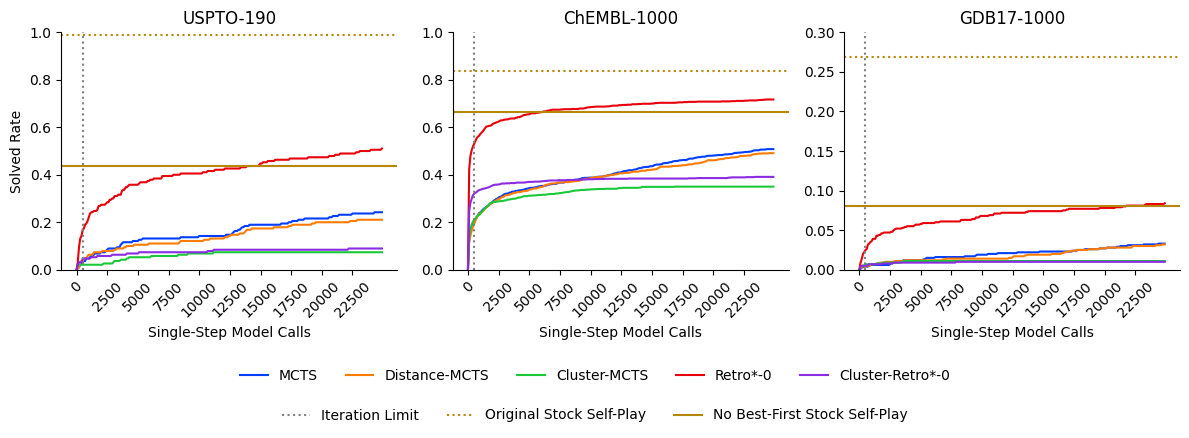

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 1x3 subplot with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)

# Iterate over each dataset and plot the solved rate per iteration
for i, dataset in enumerate(datasets):
    for algorithm in algorithm_order:
        subset = solved_rate_df[(solved_rate_df['dataset'] == dataset) & (solved_rate_df['algorithm'] == algorithm)]
        if not subset.empty:
            iteration_range = subset['expansion_iteration_range'].values[0]
            solved_rate_per_iteration = subset['solved_rate_per_expansion_call'].values[0]
            axs[i].plot(iteration_range, solved_rate_per_iteration, label=algorithm, color=algorithm_colors[algorithm])
    axs[i].set_title(f'{dataset}')
    axs[i].set_xlabel('Single-Step Model Calls')
    axs[i].set_xticks(iteration_range[::25])  # Adjust the tick frequency for better readability
    axs[i].set_xticklabels(iteration_range[::25], rotation=45)
    axs[i].axvline(x=500, color='gray', linestyle='dotted', label='Iteration Limit')  # Add vertical dotted line at 500
    
    # Add golden lines
    if dataset == 'ChEMBL-1000':
        axs[i].set_title("ChEMBL-1000")
        axs[i].set_ylim(0, 1)
        axs[i].axhline(y=0.835, color='#B8860B', linestyle='dotted', label='Original Stock Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.843
        axs[i].axhline(y=0.665, color='#B8860B', linestyle='-', label='No Best-First Stock Self-Play') # correct
    if dataset in ['GDB17-1000']:
        axs[i].set_title("GDB17-1000")
        axs[i].set_ylim(0.0, 0.3)
        axs[i].axhline(y=0.269, color='#B8860B', linestyle='dotted', label='Original Stock Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.274
        axs[i].axhline(y=0.081, color='#B8860B', linestyle='-', label='No Best-First Stock Self-Play') # correct
    if dataset in ['USPTO-190']:
        axs[i].set_title("USPTO-190")
        axs[i].set_ylabel('Solved Rate')
        axs[i].set_ylim(0.0, 1)
        axs[i].axhline(y=0.9895, color='#B8860B', linestyle='dotted', label='Original Stock Self-Play') # Note, we report the performance from the original paper. Our rerun has a slightly different value: 0.9736
        axs[i].axhline(y=0.4368, color='#B8860B', linestyle='-', label='No Best-First Stock Self-Play') # correct

# Despine the plot
sns.despine()

# Collect handles and labels for the legend
handles, labels = axs[1].get_legend_handles_labels()

# Separate algorithm handles and labels from the rest
algorithm_handles = handles[:len(solved_rate_df['algorithm'].unique())]
algorithm_labels = labels[:len(solved_rate_df['algorithm'].unique())]

other_handles = handles[len(solved_rate_df['algorithm'].unique()):]
other_labels = labels[len(solved_rate_df['algorithm'].unique()):]

# Create a single legend for algorithms
fig.legend(algorithm_handles, algorithm_labels, loc='lower center', ncol=len(algorithm_handles), frameon=False, bbox_to_anchor=(0.5, -0.00))

# Create a single legend for the rest
fig.legend(other_handles, other_labels, loc='lower center', ncol=len(other_handles), frameon=False, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to make space for the legends

plt.savefig(f"{save_path}/2_single_step_model_calls_emolecules_no_best_first.pdf", bbox_inches='tight')
plt.show()

# appendix statistics

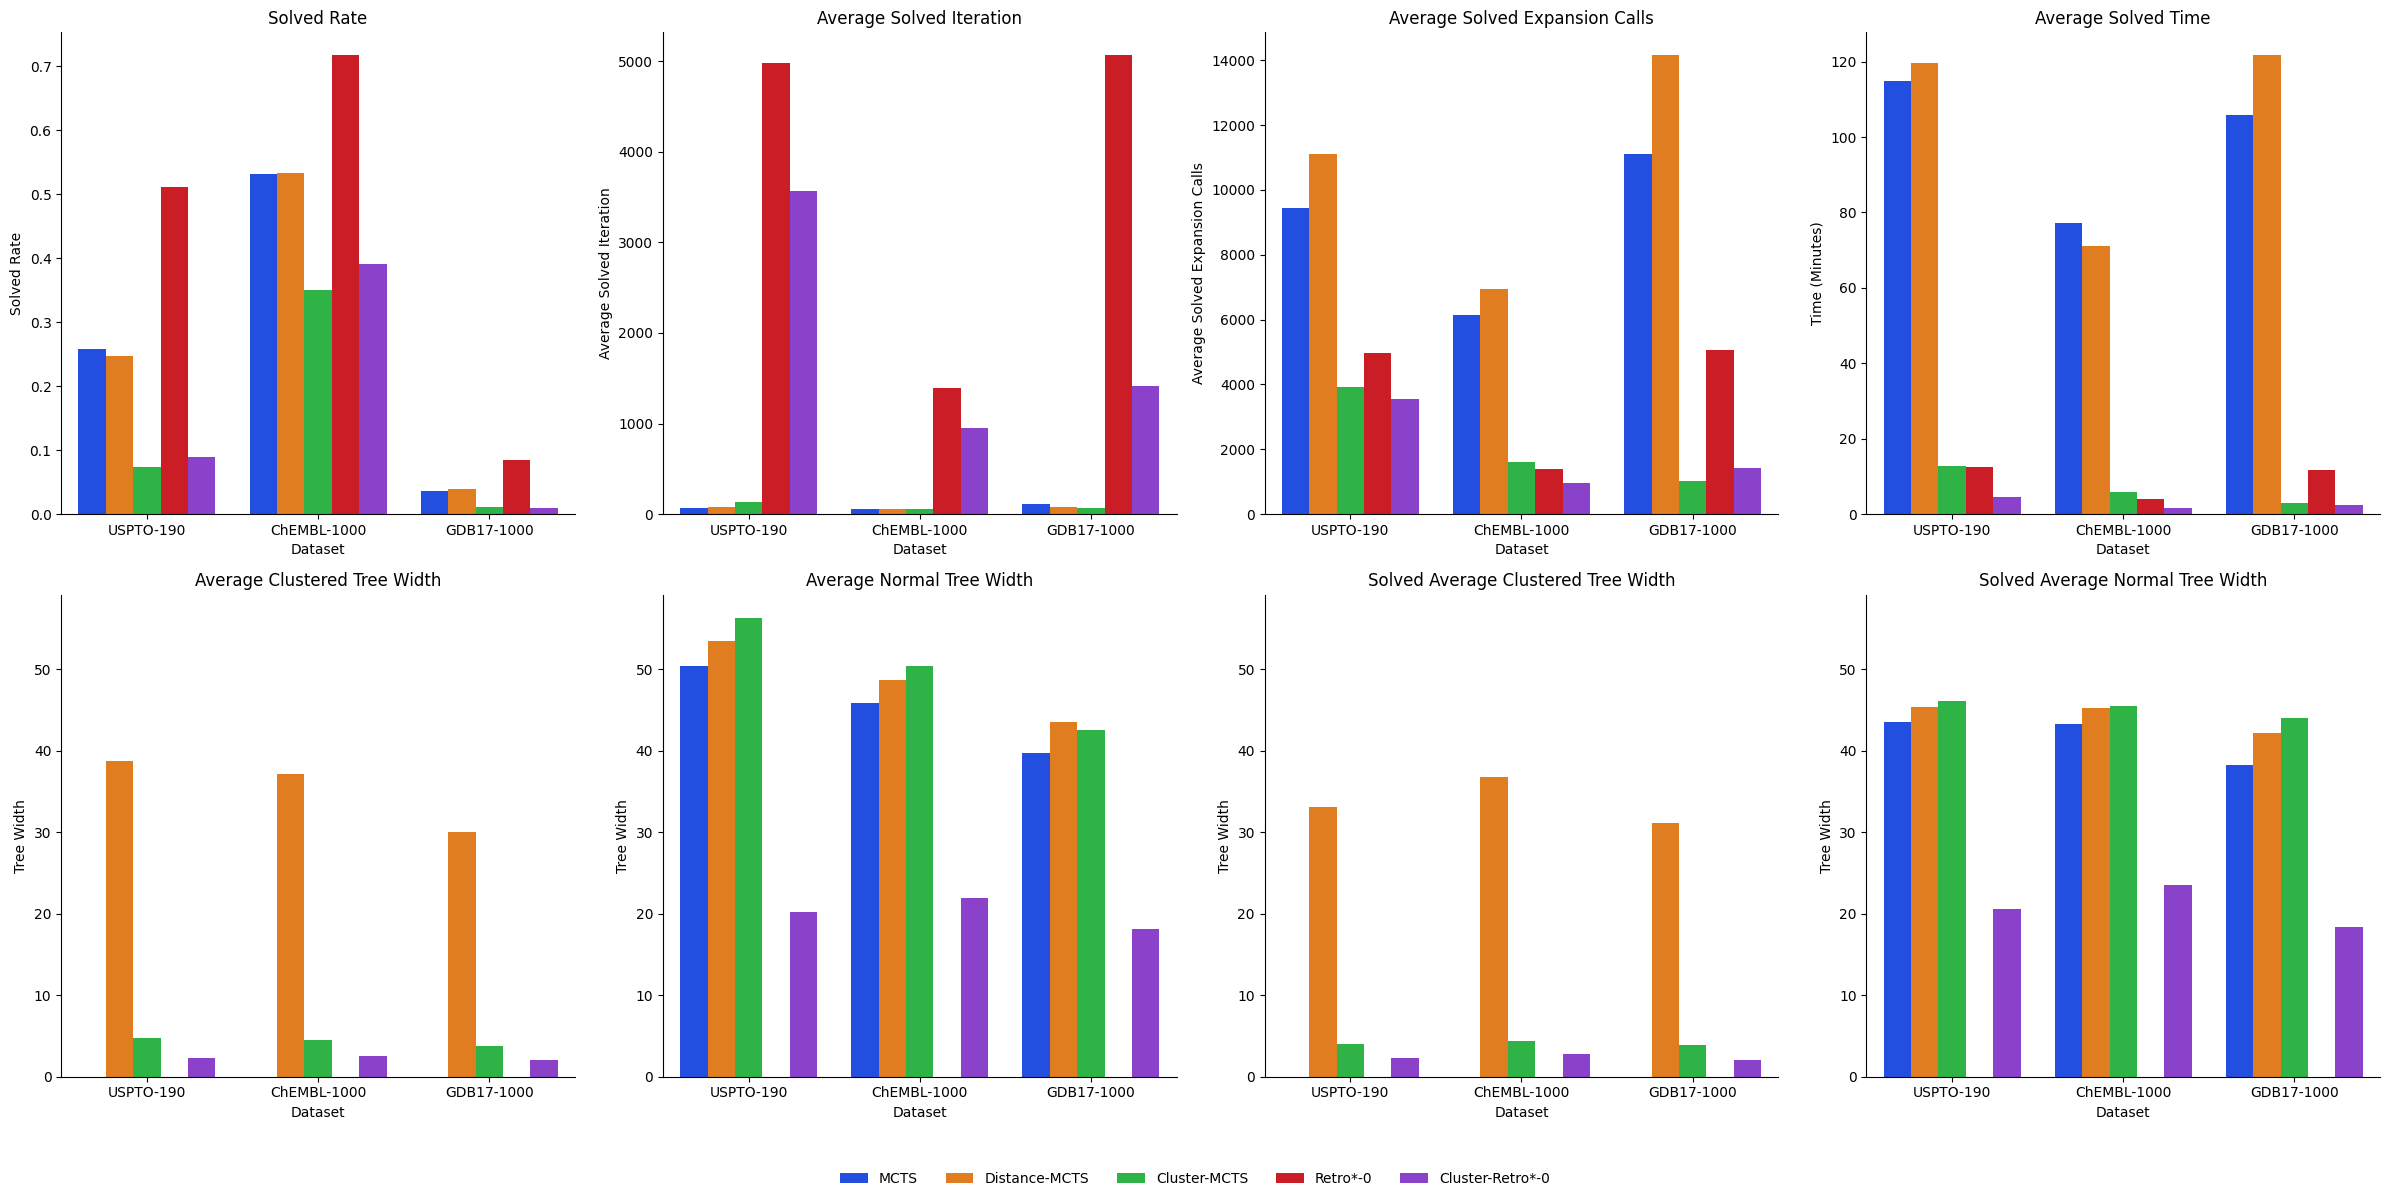

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a new dataframe for average statistics
average_stats_df = solved_rate_df.groupby(['dataset', 'algorithm']).agg({
    'solved_rate': 'mean',
    'average_solved_iteration': 'mean',
    'average_solved_time': 'mean',
    'average_expansion_calls': 'mean',
    'average_solved_expansion_calls': 'mean',
    'average_clustered_tree_width': 'mean',
    'average_normal_tree_width': 'mean',
    'solved_average_clustered_tree_width': 'mean',
    'solved_average_normal_tree_width': 'mean'
}).reset_index()

average_stats_df['dataset'] = pd.Categorical(average_stats_df['dataset'], categories=datasets, ordered=True)
average_stats_df['algorithm'] = pd.Categorical(average_stats_df['algorithm'], categories=algorithm_order, ordered=True)
average_stats_df = average_stats_df.sort_values(['dataset', 'algorithm'])

# Define the statistics to plot
stats = [
    'solved_rate', 
    'average_solved_iteration', 
    'average_solved_expansion_calls', 
    'average_solved_time',
    'average_clustered_tree_width',
    'average_normal_tree_width',
    'solved_average_clustered_tree_width',
    'solved_average_normal_tree_width'
]

# Create a 2x4 subplot
fig, axs = plt.subplots(2, 4, figsize=(24, 12))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each statistic and create a bar plot
for i, stat in enumerate(stats):
    sns.barplot(x='dataset', y=stat, hue='algorithm', data=average_stats_df, ax=axs[i], palette=algorithm_colors)
    axs[i].set_title(f'{stat.replace("_", " ").title()}')
    axs[i].set_xlabel('Dataset')
    if stat == 'average_solved_time':
        axs[i].set_ylabel('Time (Minutes)')
    elif 'clustered_tree_width' in stat or 'normal_tree_width' in stat:
        axs[i].set_ylabel('Tree Width')
    else:
        axs[i].set_ylabel(stat.replace("_", " ").title())
    sns.despine(ax=axs[i])

# Share y-axis for the second row and set consistent y-limits
second_row_axes = axs[4:]
max_ylim = max(ax.get_ylim()[1] for ax in second_row_axes)
for ax in second_row_axes:
    ax.set_ylim(0, max_ylim)
    ax.sharey(second_row_axes[0])

# Collect handles and labels for the legend
handles, labels = axs[0].get_legend_handles_labels()

# Remove individual legends
for ax in axs:
    ax.legend_.remove()

# Create a shared legend below the plots
fig.legend(handles, labels, loc='lower center', ncol=len(average_stats_df['algorithm'].unique()), frameon=False)

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

plt.savefig(f"{save_path}/2_single_step_model_calls_emolecules_no_best_first_summary_statistics_appendix.pdf", bbox_inches='tight')

plt.show()